# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## Background

<p style='text-align: justify;'> Projek ini merupakan projek webscrapping yang akan memunculkan mengenai pergerakan kurs Rupiah-Dollar sejak tahun 2021 hingga awal tahun 2022 yang dipublikasikan oleh <b>world currency exchange rates</b>. Untuk mengetahui bagaimana pergerakan kurs Rupiah-Dollar maka akan ada 2 point yang digunakan dari web ini yaitu tanggal dari bulan desember 2021 hingga Januari 2022. </p>


## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [14]:
import requests
url_get = requests.get('https://www.exchange-rates.org/history/IDR/USD/T')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [15]:
url_get.content[1:500]

b'!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n<html class="no-js ie8 oldie" lang="en" xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--><html class="no-js" lang="en" xml:lang=\'en\'><!--<![endif]-->\r\n<head>\r\n<title>Indonesian Rupiah Exchange Rate - US Dollar - Historical Exchange Rates</title>\r\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5">\r\n<meta charset="utf-8" /><meta http-equiv="Content-Type" content="text/ht'


<p style='text-align: justify;'> As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.</p>

In [16]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


## Finding the right key to scrap the data & Extracting the right information


 Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. <p style='text-align: justify;'>(Setelah mendapatkan html nya maka dicari kunci yang mewakili keseluruhan tabel pertukaran kurs Rupiah dan Dollar kemudian dimasukkan ke dalam kodingan seperti yang ada dibawah ini,Untuk menemukan rincian html agar terstruktur maka menggunakan .<b>find() </b> lalu memasukkan key yang mewakili seluruh tabel yaitu <b>table class="table table-striped table-hover table-hover-solid-row table-simple history-data"</b> kemudian menggunakan perintah print untuk memunculkan html yang format menjadi Unicode String oleh <b>.prettify</b> dan supaya rapi maka menggunakan <b>[1:500]</b> supaya hanya 500 karakter pertama yang muncul kemudian untuk mengetahui berapa banyak data yang akan di scrapping maka perlu menemukan panjanga kolom nya dengan menggunakan <b>len()</b>)</p>


In [17]:
table = soup.find('table', attrs={'class':'table table-striped table-hover table-hover-solid-row table-simple history-data'})
print(table.prettify()[1:500])

table class="table table-striped table-hover table-hover-solid-row table-simple history-data">
 <tbody>
  <tr>
   <td>
    1/7/2022
   </td>
   <td>
    Friday
   </td>
   <td>
    <a href="/Rate/USD/IDR/1-7-2022">
     14,303.69386
    </a>
    IDR
   </td>
   <td class="text-narrow-screen-hidden">
    <a href="/Rate/USD/IDR/1-7-2022">
     USD IDR rate for 1/7/2022
    </a>
   </td>
  </tr>
  <tr>
   <td>
    1/6/2022
   </td>
   <td>
    Thursday
   </td>
   <td>
    <a href="/Rate/USD/IDR/1


In [18]:
tr = table.find_all('tr',attrs={'class':""})

Finding row length.

In [19]:
row = table.find_all('tr')
row_length = len(row)
row_length

130

<p style='text-align: justify;'>Do the scrapping process here (Untuk medapatkan tanggal dan nilai pertukaran maka perlu memasukkan variabel panjang rabel supaya ditemukan atribut tanggal dan nilai mata uang sehingga menghasilkan code seperti dibawah ini, kemudian digunakan <b>.append</b> untuk menggabungkan kedua kolom. Untuk memudahkan visualisasinya maka variabel temp yang berisi tabel di reverse supaya nantinya bisa ditampilkan diagram dari tanggal paling lama ke paling baru)</p>

In [20]:
temp = [] #initiating a tuple

for i in range(1, len(tr)):
    row = table.find_all('tr',attrs={'class':""})[i]
    
    #tanggal
    date = row.find_all('td')[0].text
    date = date.strip()

    
    #nilai uang
    value = row.find_all('td')[2].text
    value = value.strip()
    
    
    temp.append((date, value))

temp

[('1/6/2022', '14,387.13904 IDR'),
 ('1/5/2022', '14,376.59427 IDR'),
 ('1/4/2022', '14,306.22137 IDR'),
 ('1/3/2022', '14,271.10676 IDR'),
 ('12/31/2021', '14,184.77099 IDR'),
 ('12/30/2021', '14,249.76380 IDR'),
 ('12/29/2021', '14,198.28676 IDR'),
 ('12/28/2021', '14,221.34174 IDR'),
 ('12/27/2021', '14,227.31928 IDR'),
 ('12/24/2021', '14,264.51755 IDR'),
 ('12/23/2021', '14,256.89960 IDR'),
 ('12/22/2021', '14,298.20378 IDR'),
 ('12/21/2021', '14,304.01234 IDR'),
 ('12/20/2021', '14,382.49273 IDR'),
 ('12/17/2021', '14,389.66562 IDR'),
 ('12/16/2021', '14,330.91366 IDR'),
 ('12/15/2021', '14,251.62584 IDR'),
 ('12/14/2021', '14,341.93227 IDR'),
 ('12/13/2021', '14,357.75629 IDR'),
 ('12/10/2021', '14,370.27875 IDR'),
 ('12/9/2021', '14,344.97904 IDR'),
 ('12/8/2021', '14,370.91961 IDR'),
 ('12/7/2021', '14,347.32452 IDR'),
 ('12/6/2021', '14,432.56943 IDR'),
 ('12/3/2021', '14,389.50020 IDR'),
 ('12/2/2021', '14,392.39767 IDR'),
 ('12/1/2021', '14,347.93748 IDR'),
 ('11/30/2021', 

In [21]:
temp = temp[::-1]
temp

[('7/12/2021', '14,491.59294 IDR'),
 ('7/13/2021', '14,476.52203 IDR'),
 ('7/14/2021', '14,404.17703 IDR'),
 ('7/15/2021', '14,469.95831 IDR'),
 ('7/16/2021', '14,495.41215 IDR'),
 ('7/19/2021', '14,490.12260 IDR'),
 ('7/20/2021', '14,514.10964 IDR'),
 ('7/21/2021', '14,495.34596 IDR'),
 ('7/22/2021', '14,508.09177 IDR'),
 ('7/23/2021', '14,492.63051 IDR'),
 ('7/26/2021', '14,487.54718 IDR'),
 ('7/27/2021', '14,468.66842 IDR'),
 ('7/28/2021', '14,414.21667 IDR'),
 ('7/29/2021', '14,467.14994 IDR'),
 ('7/30/2021', '14,501.55250 IDR'),
 ('8/2/2021', '14,445.82502 IDR'),
 ('8/3/2021', '14,391.49693 IDR'),
 ('8/4/2021', '14,313.11092 IDR'),
 ('8/5/2021', '14,315.95314 IDR'),
 ('8/6/2021', '14,403.07373 IDR'),
 ('8/9/2021', '14,363.60538 IDR'),
 ('8/10/2021', '14,379.25224 IDR'),
 ('8/11/2021', '14,385.48676 IDR'),
 ('8/12/2021', '14,387.28127 IDR'),
 ('8/13/2021', '14,327.19776 IDR'),
 ('8/16/2021', '14,376.39296 IDR'),
 ('8/17/2021', '14,439.92418 IDR'),
 ('8/18/2021', '14,372.20861 IDR')

## Creating data frame & Data wrangling

Put the array into dataframe

In [22]:
import pandas as pd

df = pd.DataFrame(temp, columns = ('date', 'value'))
df['value'] = df['value'].replace('IDR',"",regex=True).replace(',',"",regex=True)
df['value'] = df['value'].astype('float64')
df.head()

,date,value
0,7/12/2021,14491.59294
1,7/13/2021,14476.52203
2,7/14/2021,14404.17703
3,7/15/2021,14469.95831
4,7/16/2021,14495.41215


Do the data cleaning here (Untuk memunculkan plot yang diinginkan maka melakukan `.set_index` terhadap tanggalnya)

In [23]:
exchange=df[['value']].set_index(df.date)
exchange.head()

,value
date,
7/12/2021,14491.59294
7/13/2021,14476.52203
7/14/2021,14404.17703
7/15/2021,14469.95831
7/16/2021,14495.41215


Data visualisation (Untuk membuat visualisasi plotnya maka import terlebih dahulu matplotlibnya kemudian masukkan code `.plot()`dan beri judul serta masukkan ukuran visualisasinya)

In [24]:
import matplotlib
import matplotlib.pyplot as plt

<AxesSubplot:title={'center':'Indonesian Rupiahs (IDR) per US Dollar (USD)'}, xlabel='date'>

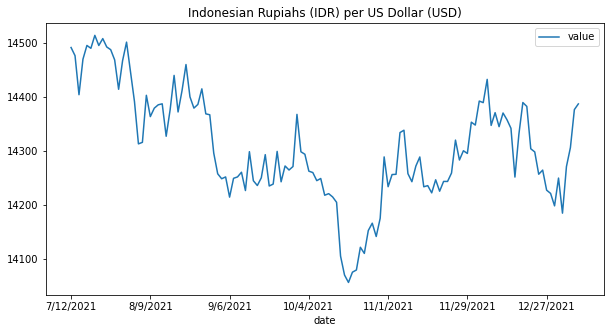

In [25]:
exchange.plot(title='Indonesian Rupiahs (IDR) per US Dollar (USD)',figsize=(10,5))


### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

<AxesSubplot:title={'center':'Indonesian Rupiahs (IDR) per US Dollar (USD)'}, xlabel='date'>

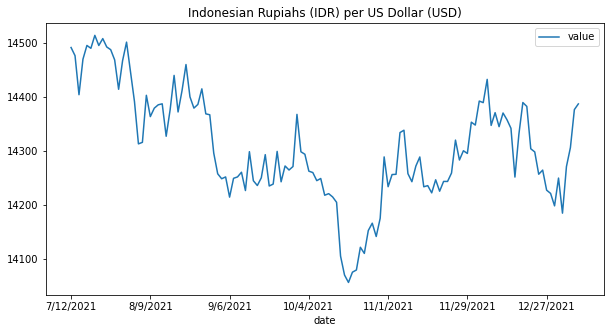

In [26]:
exchange.plot(title='Indonesian Rupiahs (IDR) per US Dollar (USD)',figsize=(10,5))

<p style='text-align: justify;'>Dari visualisasi diatas dapat dilihat bahwa nilai tukar tertinggi (max) ada pada range bulan Juli-Agustus dan terendah (min) ada pada bulan Oktober-November. Jika diliat dari grafik tersebut maka ketika bulan Oktober-November pada periode berikutnya memungkinkan terjadi peningkatan permintaan terhadap mata uang US Dollar sehingga bisa jadi peningkatan harga jika ingin menukarkan mata uang dan sebaliknya pada bulan Juli-Agutus akan banyak yang menjual atapun menukarkan uang US Dollarnya sehingga memungkinkan harga jual dapat mengalami penurunan. Jika ingin melakukan pertukaran mata uang ataupun melakukan trading forex atau sejenisnya pada peride berikutnya dapat dilakukan pada bulan Juli hingga November dengan catatan bahwa pada bulan Juli hingga Agustus dapat dilakukan penjualan terhadap mata uang US Dollar dan pada bulan Oktober hingga November dapat dilakukan pembelian terhadap US Dollar.</p>

### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.